# Data Exploration

### 1. BUSINESS DATASET 

In order to get a high level understanding of the fields present in each table, the data was loaded into a df. The csv files selected here represent a 'chunk' that make up the entire table

In [168]:
import json
import pandas as pd
import pprint

path = r"C:\Users\cardo\PycharmProjects\SPRINGBOARD\CAPSTONE\Access_data\Subset_folder"
fname = r'\business_0.csv'
filename = path+fname
df_b = pd.read_csv(filename)
df_b.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': ""u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ..."
2,bvN78flM8NLprQ1a1y5dRg,The Reclaimory,4720 Hawthorne Ave,Portland,OR,97214,45.511907,-122.613693,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Antiques, Fashion, Used, Vintage & Consignment...","{'Thursday': '11:0-18:0', 'Friday': '11:0-18:0..."
3,oaepsyvc0J17qwi8cfrOWg,Great Clips,2566 Enterprise Rd,Orange City,FL,32763,28.914482,-81.295979,3.0,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Beauty & Spas, Hair Salons",NaN
4,PE9uqAjdw0E4-8mjGl3wVA,Crossfit Terminus,1046 Memorial Dr SE,Atlanta,GA,30316,33.747027,-84.353424,4.0,14,1,"{'GoodForKids': 'False', 'BusinessParking': ""{...","Gyms, Active Life, Interval Training Gyms, Fit...","{'Monday': '16:0-19:0', 'Tuesday': '16:0-19:0'..."


Upon first glance, the primary key of the business dataset is the business_id. There are also various fields encapsulating location, reviews, hours, categories and attributes.Taking a closer look at the attributes column: 

In [169]:
attr_col = df_b['attributes'][0] 
print(attr_col)
print(type(attr_col))


{'RestaurantsTableService': 'True', 'WiFi': "u'free'", 'BikeParking': 'True', 'BusinessParking': "{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}", 'BusinessAcceptsCreditCards': 'True', 'RestaurantsReservations': 'False', 'WheelchairAccessible': 'True', 'Caters': 'True', 'OutdoorSeating': 'True', 'RestaurantsGoodForGroups': 'True', 'HappyHour': 'True', 'BusinessAcceptsBitcoin': 'False', 'RestaurantsPriceRange2': '2', 'Ambience': "{'touristy': False, 'hipster': False, 'romantic': False, 'divey': False, 'intimate': False, 'trendy': False, 'upscale': False, 'classy': False, 'casual': True}", 'HasTV': 'True', 'Alcohol': "'beer_and_wine'", 'GoodForMeal': "{'dessert': False, 'latenight': False, 'lunch': False, 'dinner': False, 'brunch': False, 'breakfast': False}", 'DogsAllowed': 'False', 'RestaurantsTakeOut': 'True', 'NoiseLevel': "u'average'", 'RestaurantsAttire': "'casual'", 'RestaurantsDelivery': 'None'}
<class 'str'>


The attributes column is populated with a dictionary like format. To allow better querying,this can be first converted to a dictionary so that properties of the business relevant to the study can later be extracted by attribute name: 

In [170]:
import ast  
res = ast.literal_eval(attr_col)
for key,val in res.items(): 
    print(key, ':', val)

RestaurantsTableService : True
WiFi : u'free'
BikeParking : True
BusinessParking : {'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}
BusinessAcceptsCreditCards : True
RestaurantsReservations : False
WheelchairAccessible : True
Caters : True
OutdoorSeating : True
RestaurantsGoodForGroups : True
HappyHour : True
BusinessAcceptsBitcoin : False
RestaurantsPriceRange2 : 2
Ambience : {'touristy': False, 'hipster': False, 'romantic': False, 'divey': False, 'intimate': False, 'trendy': False, 'upscale': False, 'classy': False, 'casual': True}
HasTV : True
Alcohol : 'beer_and_wine'
GoodForMeal : {'dessert': False, 'latenight': False, 'lunch': False, 'dinner': False, 'brunch': False, 'breakfast': False}
DogsAllowed : False
RestaurantsTakeOut : True
NoiseLevel : u'average'
RestaurantsAttire : 'casual'
RestaurantsDelivery : None


Now that it's in a dictionary we can see the attributes column contains several subcategories with mostly boolean values and some other descriptions like 'free' for WiFi, and 'beer_and_wine' for Alcohol. One way to clean this data would be to standardize all the values of the dictionary to boolean. 

Let's now compare how the attributes column varies from each row: 

In [171]:
attr_col_2 = df_b['attributes'][10] 
res2 = ast.literal_eval(attr_col_2)
for key,val in res2.items(): 
    print(key, ':', val)

BikeParking : True
RestaurantsTakeOut : True
BusinessParking : {'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}
WheelchairAccessible : True
DogsAllowed : True
RestaurantsDelivery : False
BusinessAcceptsBitcoin : False
Caters : False
BusinessAcceptsCreditCards : True


This shows that the length of this attributes dictionary varies with each entry meaning the data is not homogenous (likely because these are optionally populated on Yelp). This will result in errors when trying to query about an attribute for a business that doesn't exist. To address this, let's  ####

Moving from the attributes column, the "categories" column needs some additional processing to make it easier to query. Firstly, since the business dataset does not contain restaurants exclusively, rows that are not restaurants can be filtered by deleting/removing any rows that don't contain the tag 'Restaurants' in categories. For example: 

In [172]:
df_restaurants_only = df_b[df_b.categories.str.contains('Restaurant', na=False)]
print('original df:', len(df_b), 'filtered df:', len(df_restaurants_only))

df_restaurants_only.head()


original df: 1000 filtered df: 311


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': ""u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ..."
5,D4JtQNTI4X3KcbzacDJsMw,Bob Likes Thai Food,3755 Main St,Vancouver,BC,V5V,49.251342,-123.101333,3.5,169,1,"{'GoodForKids': 'True', 'Alcohol': ""u'none'"", ...","Restaurants, Thai","{'Monday': '17:0-21:0', 'Tuesday': '17:0-21:0'..."
7,jFYIsSb7r1QeESVUnXPHBw,Boxwood Biscuit,740 S High St,Columbus,OH,43206,39.947007,-82.997471,4.5,11,1,NaN,"Breakfast & Brunch, Restaurants","{'Saturday': '8:0-14:0', 'Sunday': '8:0-14:0'}"
12,HPA_qyMEddpAEtFof02ixg,Mr G's Pizza & Subs,474 Lowell St,Peabody,MA,01960,42.541155,-70.973438,4.0,39,1,"{'RestaurantsGoodForGroups': 'True', 'HasTV': ...","Food, Pizza, Restaurants","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."


Now, let's take a closer look at the "hours" column: 


In [173]:
hours = df_restaurants_only['hours']
print(hours)

0      {'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...
1      {'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ...
5      {'Monday': '17:0-21:0', 'Tuesday': '17:0-21:0'...
7         {'Saturday': '8:0-14:0', 'Sunday': '8:0-14:0'}
12     {'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...
                             ...                        
976    {'Monday': '10:0-20:0', 'Tuesday': '10:0-20:0'...
977    {'Monday': '16:0-21:30', 'Tuesday': '16:0-21:3...
979    {'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...
984    {'Monday': '17:30-23:0', 'Tuesday': '17:30-23:...
996    {'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...
Name: hours, Length: 311, dtype: object


While the data presented is detailed, like the attributes column, not all rows are equal lengths. Some restaurants are only open on weekends for instance. A better way to aggregate the data would be to break fields into 3 new columns: 
days_open, time_open and time_close where the days_open represents the sum of the days open, time_open and time_close represent the opening and closing times accordingly. 
This way, each restaurant will have uniform length fields 

In [174]:
#example for 1 row..

hours_row = df_restaurants_only['hours'][0]
print(hours_row)
res_hours_row = ast.literal_eval(hours_row)
print('\n')
print('days_open:', len(res_hours_row), '  |  ' ,'time_open:', res_hours_row['Monday'][0:2],'  |  ' , 'time_close', res_hours_row['Monday'][5:7])

{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0', 'Wednesday': '11:0-23:0', 'Thursday': '11:0-23:0', 'Friday': '11:0-23:0', 'Saturday': '11:0-23:0', 'Sunday': '11:0-23:0'}


days_open: 7   |   time_open: 11   |   time_close 23


### 2. USER DATASET 

A similar approach is taken to load the users dataset to get a high level understanding of the structure and fields: 

In [175]:
path = r"C:\Users\cardo\PycharmProjects\SPRINGBOARD\CAPSTONE\Access_data\Subset_folder"
fname = r'\user_0.csv'
filename = path+fname
df_u = pd.read_csv(filename)
df_u.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,q_QQ5kBBwlCcbL1s4NVK3g,Jane,1220,2005-03-14 20:26:35,15038,10030,11291,"2006,2007,2008,2009,2010,2011,2012,2013,2014","xBDpTUbai0DXrvxCe3X16Q, 7GPNBO496aecrjJfW6UWtg...",1357,...,163,190,361,147,1212,5691,2541,2541,815,323
1,dIIKEfOgo0KqUfGQvGikPg,Gabi,2136,2007-08-10 19:01:51,21272,10289,18046,"2007,2008,2009,2010,2011,2012,2013,2014,2015,2...","XPzYf9_mwG2eXYP2BAGSTA, 2LooM5dcIk2o01nftYdPIg...",1025,...,87,94,232,96,1187,3293,2205,2205,472,294
2,D6ErcUnFALnCQN4b1W_TlA,Jason,119,2007-02-07 15:47:53,188,128,130,"2010,2011","GfB6sC4NJQvSI2ewbQrDNA, jhZtzZNNZJOU2YSZ6jPlXQ...",16,...,1,3,0,0,5,20,31,31,3,1
3,JnPIjvC0cmooNDfsa9BmXg,Kat,987,2009-02-09 16:14:29,7234,4722,4035,"2009,2010,2011,2012,2013,2014","HQZPQhKMwRAyS6BCselVWQ, kP2U1s_sjQfHO9grxiyDTA...",420,...,129,93,219,90,1120,4510,1566,1566,391,326
4,37Hc8hr3cw0iHLoPzLK6Ow,Christine,495,2008-03-03 04:57:05,1577,727,1124,"2009,2010,2011","-Q88pZUcrfN0BLBDp-bkAQ, etPn4Pv1Gc4cRZjRgB_BOw...",47,...,19,32,16,15,77,131,310,310,98,44


Starting with the "yelping_since" column, only the year is really needed to draw conclusions on the user's status - for instance to get a sense of the user's experience on yelp. The month, date and time while providing more details rarely add more to the overall analysis 

In [176]:
yelping_since = df_u['yelping_since'][0][0:4]
print(yelping_since)

2005


The next three columns feature some stats on the reviews left by the user - how many of their reviews were tagged as useful, funny or cool. 

Next, we come to the elite column which depicts the years during which a user was an elite yelper. The first issue with this colunn is missing values if the yelper was never elite: 

In [177]:
df_u['elite'][22:30]

22                                            2009,2010
23                                            2007,2008
24                                                  NaN
25                  2014,2015,2016,2017,2018,2019,20,20
26                                                  NaN
27    2010,2011,2012,2013,2014,2015,2016,2017,2018,2...
28                        2009,2010,2011,2012,2013,2014
29                                                  NaN
Name: elite, dtype: object

Instead of NaN, it would make more sense for these rows to be NULL or False. In fact a better representation for the other rows would be a boolean - True if the user was ever an elite member and False if not. This is because for the purpose of this analysis, knowing the individual years of the user's elite status doesn't add that much value. 

In [179]:
df_no_nan = df_u.fillna('False')
for i in range(len(df_no_nan)): 
        if df_no_nan['elite'][i] != 'False':
            df_no_nan['elite'][i] = 'True'
            
df_no_nan['elite'][22:30]


<ipython-input-179-809a4b5a4fb4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_nan['elite'][i] = 'True'


22     True
23     True
24    False
25     True
26    False
27     True
28     True
29    False
Name: elite, dtype: object

Moving on, the remaining columns are compliments on the user profile itself and don't seem relevant to the study. These columns can simply be dropped. 

### 3. REVIEW DATASET

In [181]:
path = r"C:\Users\cardo\PycharmProjects\SPRINGBOARD\CAPSTONE\Access_data\Subset_folder"
fname = r'\review_0.csv'
filename = path+fname
df_r = pd.read_csv(filename)
df_r.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,lWC-xP3rd6obsecCYsGZRg,ak0TdVmGKo4pwqdJSTLwWw,buF9druCkbuXLX526sGELQ,4,3,1,1,Apparently Prides Osteria had a rough summer a...,2014-10-11 03:34:02
1,8bFej1QE5LXp4O05qjGqXA,YoVfDbnISlW0f7abNQACIg,RA4V8pr014UyUbDvI-LW2A,4,1,0,0,This store is pretty good. Not as great as Wal...,2015-07-03 20:38:25
2,NDhkzczKjLshODbqDoNLSg,eC5evKn1TWDyHCyQAwguUw,_sS2LBIGNT5NQb6PD1Vtjw,5,0,0,0,I called WVM on the recommendation of a couple...,2013-05-28 20:38:06
3,T5fAqjjFooT4V0OeZyuk1w,SFQ1jcnGguO0LYWnbbftAA,0AzLzHfOJgL7ROwhdww2ew,2,1,1,1,I've stayed at many Marriott and Renaissance M...,2010-01-08 02:29:15
4,sjm_uUcQVxab_EeLCqsYLg,0kA0PAJ8QFMeveQWHFqz2A,8zehGz9jnxPqXtOc7KaJxA,4,0,0,0,The food is always great here. The service fro...,2011-07-28 18:05:01


Since the restaurants under study will be those filtered in the business dataset, the review table therefore only needs to contain reviews coresponding to those business_ids. To do this, the review table can be joined on the business_id. This can be performed directly in SQL. Other than this, let's take a closer look at the "text" column : 

In [185]:
pprint.pprint(df_r['text'][0])

('Apparently Prides Osteria had a rough summer as evidenced by the almost '
 'empty dining room at 6:30 on a Friday night. However new blood in the '
 'kitchen seems to have revitalized the food from other customers recent '
 'visits. Waitstaff was warm but unobtrusive. By 8 pm or so when we left the '
 'bar was full and the dining room was much more lively than it had been. '
 'Perhaps Beverly residents prefer a later seating. \n'
 '\n'
 'After reading the mixed reviews of late I was a little tentative over our '
 'choice but luckily there was nothing to worry about in the food department. '
 'We started with the fried dough, burrata and prosciutto which were all '
 "lovely. Then although they don't offer half portions of pasta we each "
 'ordered the entree size and split them. We chose the tagliatelle bolognese '
 'and a four cheese filled pasta in a creamy sauce with bacon, asparagus and '
 'grana frita. Both were very good. We split a secondi which was the special '
 'Berkshire po

The example above is only 1 row of the review - a sizeable block of text that will be impossible to query easily without analyzing and breaking it down. The initial thought is to perform some basic sentiment analysis on each review to come up with an overall score based on positive/negative commentary. This will transform the qualitative text into a quantitative field that will be easy to query. Dependng on the volume/level of integrity needed, existing sentiment analysis tools might have to be leveraged to process this data. 

### 4. TIPS DATASET

In [186]:
path = r"C:\Users\cardo\PycharmProjects\SPRINGBOARD\CAPSTONE\Access_data\Subset_folder"
fname = r'\tips_0.csv'
filename = path+fname
df_t = pd.read_csv(filename)
df_t.head()

,user_id,business_id,text,date,compliment_count
0,WCjg0jdHXMlwbqS9tZUx8Q,ENwBByjpoa5Gg7tKgxqwLg,Carne asada chips...,2011-07-22 19:07:35,0
1,42-Z02y9bABShAGZhuSzrQ,jKO4Og6ucdX2-YCTKQVYjg,Best happy hour from 3pm to 6pm! $1 off martin...,2014-09-10 07:33:29,0
2,5u7E3LYp_3eB8dLuUBazXQ,9Bto7mky640ocgezVKSfVg,"Nice people, skilled staff, clean location - b...",2013-12-13 23:23:41,0
3,wDWoMG5N9oI4DJ-p7z8EBg,XWFjKtRGZ9khRGtGg2ZvaA,"1/2-price bowling & the ""Very"" Old Fashion are...",2017-07-11 23:07:16,0
4,JmuFlorjjRshHTKzTwNtgg,mkrx0VhSMU3p3uhyJGCoWA,"Solid gold's. Great sauna. Great staff, too. E...",2016-11-30 08:46:36,0


The tips dataset is very similar to the review dataset and contains a text field with general tips and notes from the users.The text can probably be combined with the review text before performing the sentiment analysis/weighting since it doesn't bear a lot of significance on its own. 

### 5. CHECKIN DATASET

Finally, the checkin dataset contains the business id and all the dates+time a user checked in via yelp in the timespan that this data was collected: 

In [201]:
path = r"C:\Users\cardo\PycharmProjects\SPRINGBOARD\CAPSTONE\Access_data\Subset_folder"
fname = r'\checkin_0.csv'
filename = path+fname
df_c = pd.read_csv(filename)
df_c.head()

,business_id,date
0,--0r8K_AQ4FZfLsX3ZYRDA,2017-09-03 17:13:59
1,--0zrn43LEaB4jUWTQH_Bg,"2010-10-08 22:21:20, 2010-11-01 21:29:14, 2010..."
2,--164t1nclzzmca7eDiJMw,"2010-02-26 02:06:53, 2010-02-27 08:00:09, 2010..."
3,--2aF9NhXnNVpDV0KS3xBQ,"2014-11-03 16:35:35, 2015-01-30 18:16:03, 2015..."
4,--2mEJ63SC_8_08_jGgVIg,"2010-12-15 17:10:46, 2013-12-28 00:27:54, 2015..."


Unsurprisingly, the 'date' field varies in length given the number of checkins. Thus, summing the number of checkins will normalize this data and provide a more meaningful metric to compare restaurant popularity by: 

In [202]:
for i in range(len(df_c)):
    df_c['date'][i] = len(df_c['date'][i]) 

df_c.columns = ["business_id", "no_of_checkins"]
df_c.head()

,business_id,no_of_checkins
0,--0r8K_AQ4FZfLsX3ZYRDA,19
1,--0zrn43LEaB4jUWTQH_Bg,187
2,--164t1nclzzmca7eDiJMw,6529
3,--2aF9NhXnNVpDV0KS3xBQ,166
4,--2mEJ63SC_8_08_jGgVIg,82


### 6. PUTTING IT ALL TOGETHER: ENTITY-RELATIONSHIP DIAGRAM:

Finally, all these tables can be represented as an entity relationship diagram. Some of the tables like the business, user and reviews tables can be further subdivided to avoid lengthly fields and embedded dictionaries inside columns which would make it harder to query in SQL. 
Thus a separate table for attributes, hours of operation, location details and cuisine and overall business details is depicted instead of one large table. 
The user table similarly has an overview of user details and 2 supplementary tables of user review statistics and user profile statistics that provide more details.
The review details table currently contains the review text as well as the text from the tips table but this architecture will likely change after sentiment analysis. 
Lastly, the checkins dataset remains as is since it already conveys the relevant information in a very concise manner. 

All of this can be illustrated by the diagram below: 

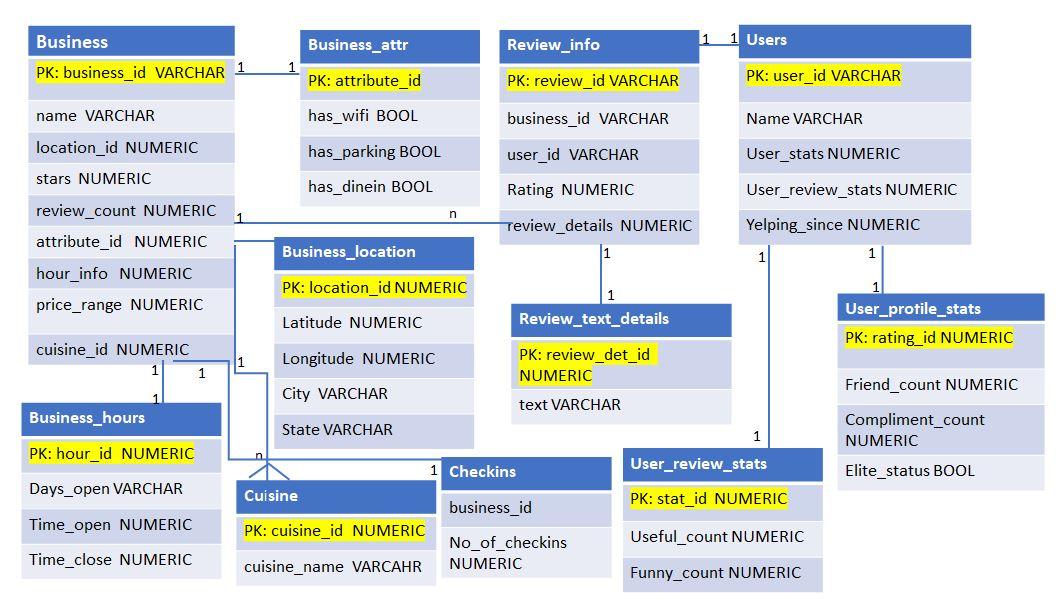